Firstly, we would be importing the needed libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

import re
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from nltk import sent_tokenize, word_tokenize
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer

from time import time
import pickle

Let's get the dataset in(Import the dataset)

In [71]:
df = pd.read_csv(r'C:\Users\kccha\OneDrive\Desktop\Programming\Cyber bullying detection\dataset.csv')

Lets assess the first five stats

In [72]:
df.head()

,headline,label
0,cock suck before you piss around on my work,-1
1,you are gay or antisemmitian archangel white ...,-1
2,fuck your filthy mother in the ass dry,-1
3,get fuck ed up get fuck ed up got a drink t...,-1
4,stupid peace of shit stop deleting my stuff ...,-1


Let's check the labels

In [73]:
df['label'].unique()

array([-1,  0])

We have to do dataframe manipulation to convert -1 to zero/1 so we can "usefulize" the dataset

In [74]:
def perform_data_manipulation():
    df = pd.read_csv(r'C:\Users\kccha\OneDrive\Desktop\Programming\Cyber bullying detection\dataset.csv')
    for index in df.index:
        if df.loc[index, 'label']==-1:
            df.loc[index, 'label'] = 1
    return df

We call the method

In [75]:
df = perform_data_manipulation()

Let's confirm the conversion

In [76]:
df.head()

,headline,label
0,cock suck before you piss around on my work,1
1,you are gay or antisemmitian archangel white ...,1
2,fuck your filthy mother in the ass dry,1
3,get fuck ed up get fuck ed up got a drink t...,1
4,stupid peace of shit stop deleting my stuff ...,1


In [77]:
df['label'].unique()

array([1, 0])

In [78]:
df.shape[0]

18148

Let's check how many values are 1 and how many are 0, this tells us if the data is balanced or imbalanced

So we can do this classification using a Pie chart

In [79]:
def performdatadistribution(df):
    total = df.shape[0]
    num_non_toxic = df[df['label']==0].shape[0]
    
    slices = [num_non_toxic/total, (total-num_non_toxic)/total]
    
    labeling = ['Non-Toxic', 'Toxic']
    
    explode = [0.2, 0]
    
    plt.pie(slices, explode = explode, shadow=True, autopct="%1.1f%%", labels = labeling, wedgeprops={'edgecolor': 'black'})
    
    plt.title('Number of Toxic Vs Non- Toxic Test Sample')
    
    plt.tight_layout()
    
    plt.show()

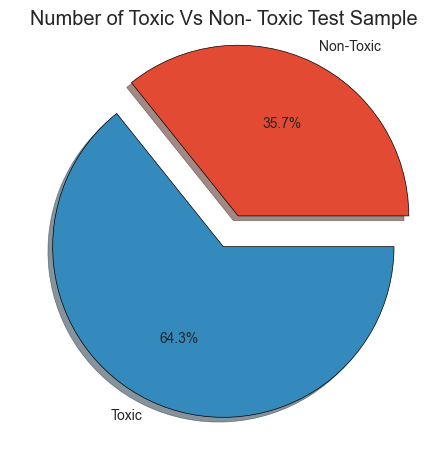

In [80]:
performdatadistribution(df)

Let's try to remove the patterns

In [81]:
def remove_pattern(input_txt, pattern):
    if (type(input_txt)==str):
        r = re.finall(pattern, input_txt)
        for i in r:
            input_txt = re.sub(i, '', input_txt)
        return input_txt
    else:
        return '' 

In [82]:
df.head(1)

,headline,label
0,cock suck before you piss around on my work,1


In [83]:
# import pandas as pd
# import numpy as np
# import nltk

# Ensure the necessary NLTK resources are available
nltk.download('wordnet')

# Function to remove a specific pattern from the text (e.g., @user mentions)
def remove_pattern(input_txt, pattern):
    import re
    return re.sub(pattern, '', input_txt)  # Correct: Defined remove_pattern function

def datasetCleaning(df):
    # Calculate the length of the headline
    df['length_headline'] = df['headline'].str.len()
    
    # Concatenate the DataFrame with itself
    combined_df = pd.concat([df, df], ignore_index=True)  # Correct: Used pd.concat([df, df], ignore_index=True)
    
    # Remove @user mentions
    combined_df['tidy_tweet'] = np.vectorize(remove_pattern)(combined_df['headline'], '@[\w]*')

    # Remove non-alphabetic characters and # symbols
    combined_df['tidy_tweet'] = combined_df['tidy_tweet'].str.replace('[^a-zA-Z#]', ' ', regex=True)
    # Correct: Added regex=True in str.replace to ensure the method treats the pattern as a regular expression

    # Remove words with less than 3 characters
    combined_df['tidy_tweet'] = combined_df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

    # Calculate the length of the cleaned tweet
    combined_df['length_tidy_tweet'] = combined_df['tidy_tweet'].str.len()
    # Correct: Replaced ['tidy_tweet'].str.len() with combined_df['tidy_tweet'].str.len()

    # Tokenization
    tokenized_tweet = combined_df['tidy_tweet'].apply(lambda x: x.split())

    # Lemmatization
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tokenized_tweet = tokenized_tweet.apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
    # Correct: Changed lemmatizer.lemmatizer(i) to lemmatizer.lemmatize(i)

    # Rejoin the tokens into a single string
    combined_df['tidy_tweet'] = tokenized_tweet.apply(lambda x: ' '.join(x))
    # Correct: Added logic to rejoin tokens into a single string after lemmatization

    return combined_df, df


<>:21: SyntaxWarning: invalid escape sequence '\w'
<>:21: SyntaxWarning: invalid escape sequence '\w'
C:\Users\kccha\AppData\Local\Temp\ipykernel_25316\2980168232.py:21: SyntaxWarning: invalid escape sequence '\w'
  combined_df['tidy_tweet'] = np.vectorize(remove_pattern)(combined_df['headline'], '@[\w]*')
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kccha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [84]:
combined_df, df = datasetCleaning(df)

Let's split the Dataset

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
combined_df.head()

,headline,label,length_headline,tidy_tweet,length_tidy_tweet
0,cock suck before you piss around on my work,1,44,cock suck before piss around work,33
1,you are gay or antisemmitian archangel white ...,1,624,antisemmitian archangel white tiger meow greet...,400
2,fuck your filthy mother in the ass dry,1,39,fuck your filthy mother,23
3,get fuck ed up get fuck ed up got a drink t...,1,121,fuck fuck drink that cant down fuck fuck fuck ...,51
4,stupid peace of shit stop deleting my stuff ...,1,93,stupid peace shit stop deleting stuff hole fal...,57


In [87]:
def performdatasplit(x, y, combined_df, df):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(combined_df['tidy_tweet'], combined_df['label'], test_size=x, random_state=y)

    # Load stopwords from a file
    with open('stopwords.txt', 'r') as file:
        content = file.read()
    content_list = content.split('\n')

    # Initialize TF-IDF Vectorizer with the stopwords
    Tfidvector = TfidfVectorizer(stop_words=content_list, lowercase=True)

    # Transform the training data into TF-IDF features
    training_data = Tfidvector.fit_transform(X_train.values.astype('U'))

    # Transform the testing data into TF-IDF features
    testing_data = Tfidvector.transform(X_test.values.astype('U'))

    # Save the entire TF-IDF vectorizer object
    filename = 'tfidfvectorizer.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(Tfidvector, file)

    # Return the split datasets and other relevant objects
    return X_train, X_test, y_train, y_test, testing_data, filename, training_data, content_list


In [88]:
X_train , X_test, y_train, y_test, testing_data, filename, training_data, content_list = performdatasplit(0.2, 42, combined_df, df)

c:\Users\kccha\OneDrive\Desktop\Programming\Cyber bullying detection\cyberbullyingdetectorenv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ninad'] not in stop_words.
  warnings.warn(


Apply Machine learning algorithms

In [89]:
!pip install xgboost
import xgboost as xgb
import pickle
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from time import time



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [90]:
def pipeline(X_train, y_train, X_test, y_test):
    MODELS = [
        LinearSVC(),
        LogisticRegression(),
        MultinomialNB(),
        DecisionTreeClassifier(),
        AdaBoostClassifier(),
        BaggingClassifier(),
        SGDClassifier()
    ]

    final_result = []

    for model in MODELS:
        results = {}  # Initialize the results dictionary inside the loop
        results['Algorithm'] = model.__class__.__name__

        start = time()
        print(f'Training {model.__class__.__name__}...')
        
        # Fit the model
        model.fit(X_train, y_train)
        end = time()
        
        results['Training Time'] = end - start

        # Save the model to a file
        filename = model.__class__.__name__ + '.pkl'
        pickle.dump(model, open(filename, 'wb'))

        # Measure prediction time
        start = time()
        prediction_test = model.predict(X_test)
        prediction_train = model.predict(X_train)
        end = time()

        results['Prediction Time'] = end - start

        # Calculate metrics
        results['Accuracy : Test'] = accuracy_score(y_test, prediction_test)
        results['Accuracy : Train'] = accuracy_score(y_train, prediction_train)

        results['F1_Score : Test'] = f1_score(y_test, prediction_test, average='weighted')
        results['F1_Score : Train'] = f1_score(y_train, prediction_train, average='weighted')

        results['Precision : Test'] = precision_score(y_test, prediction_test, average='weighted')
        results['Precision : Train'] = precision_score(y_train, prediction_train, average='weighted')

        results['Recall : Test'] = recall_score(y_test, prediction_test, average='weighted')
        results['Recall : Train'] = recall_score(y_train, prediction_train, average='weighted')

        #I maintained "average = 'weighted'" for the purpose of ease of transitions in case of doing a multiclass classification, for instance in the future maybe trying to create a classification that involves subtle jabs or stuff like that and easier scalability basically

        print(f'Training {model.__class__.__name__} finished in {results["Training Time"]:.2f} sec')

        final_result.append(results.copy())

    return final_result




In [91]:
final_result = pipeline(training_data, y_train, testing_data, y_test)

Training LinearSVC...
Training LinearSVC finished in 0.13 sec
Training LogisticRegression...
Training LogisticRegression finished in 0.22 sec
Training MultinomialNB...
Training MultinomialNB finished in 0.01 sec
Training DecisionTreeClassifier...
Training DecisionTreeClassifier finished in 6.16 sec
Training AdaBoostClassifier...


c:\Users\kccha\OneDrive\Desktop\Programming\Cyber bullying detection\cyberbullyingdetectorenv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training AdaBoostClassifier finished in 3.63 sec
Training BaggingClassifier...
Training BaggingClassifier finished in 49.48 sec
Training SGDClassifier...
Training SGDClassifier finished in 0.04 sec


In [92]:
def performfinalresult(final_results):
    results = pd.DataFrame(final_results)
    
    # Reindex the columns
    results = results.reindex(columns=[
        'Algorithm', 'Accuracy : Test', 'Precision : Test', 'Recall : Test', 'F1_Score : Test', 'Prediction Time',
        'Accuracy : Train', 'Precision : Train', 'Recall : Train', 'F1_Score : Train', 'Training Time'
    ])
    
    # Sort the values based on 'F1 Score : Test' in descending order
    results.sort_values(by='F1_Score : Test', inplace=True, ascending=False)

    return results


In [93]:
results = performfinalresult(final_result)

In [94]:
results.head(10)
results.reset_index(drop = True)

,Algorithm,Accuracy : Test,Precision : Test,Recall : Test,F1_Score : Test,Prediction Time,Accuracy : Train,Precision : Train,Recall : Train,F1_Score : Train,Training Time
0,DecisionTreeClassifier,0.973140,0.973171,0.973140,0.973053,0.031439,0.996384,0.996388,0.996384,0.996382,6.161606
1,BaggingClassifier,0.966804,0.966763,0.966804,0.966776,0.335527,0.994317,0.994317,0.994317,0.994315,49.484471
2,LinearSVC,0.963636,0.963657,0.963636,0.963646,0.000000,0.987808,0.987823,0.987808,0.987813,0.129861
3,LogisticRegression,0.935262,0.935634,0.935262,0.935401,0.002891,0.959705,0.959822,0.959705,0.959750,0.221449
4,SGDClassifier,0.934848,0.935731,0.934848,0.935112,0.002404,0.957260,0.957604,0.957260,0.957364,0.041260
5,MultinomialNB,0.897796,0.900336,0.897796,0.895336,0.003241,0.926367,0.927897,0.926367,0.925223,0.014701
6,AdaBoostClassifier,0.838567,0.872707,0.838567,0.842066,0.667972,0.839027,0.873412,0.839027,0.842307,3.629599


In [95]:
results.describe().loc[['min', 'max']]

,Accuracy : Test,Precision : Test,Recall : Test,F1_Score : Test,Prediction Time,Accuracy : Train,Precision : Train,Recall : Train,F1_Score : Train,Training Time
min,0.838567,0.872707,0.838567,0.842066,0.000000,0.839027,0.873412,0.839027,0.842307,0.014701
max,0.973140,0.973171,0.973140,0.973053,0.667972,0.996384,0.996388,0.996384,0.996382,49.484471


Summary in Graph

Text(0.5, 1.0, 'Classification Summary of Algorithms')

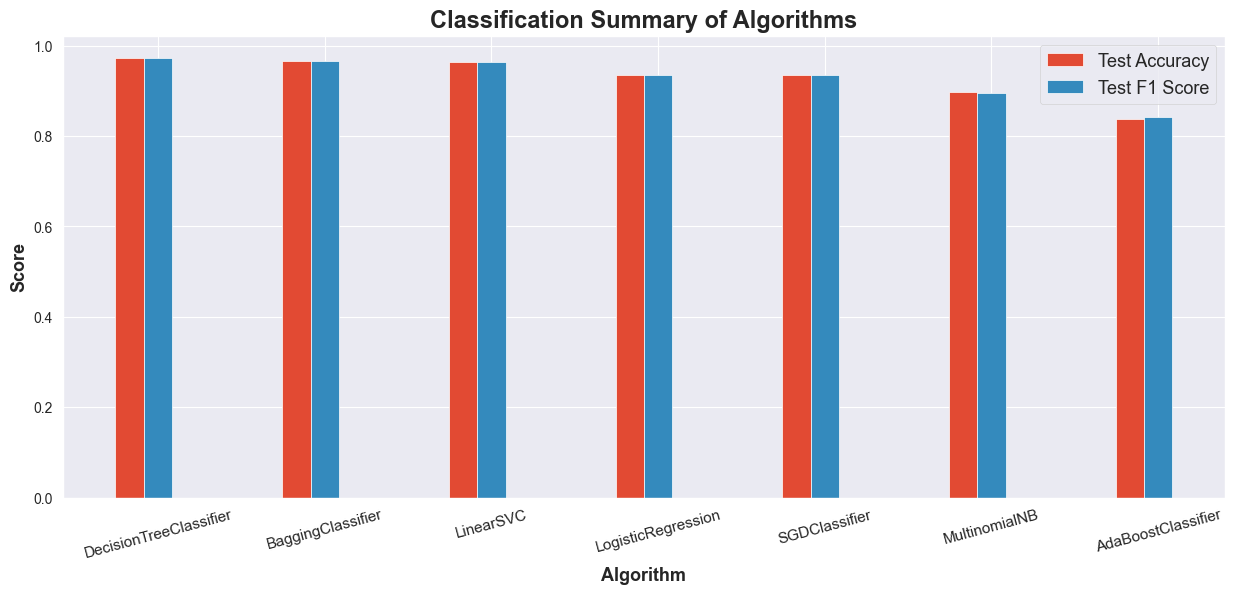

In [96]:
# Finding the best scores
best_acc = results[results['Accuracy : Test'] == results['Accuracy : Test'].max()]
best_f1 = results[results['F1_Score : Test'] == results['F1_Score : Test'].max()]
best_precision = results[results['Precision : Test'] == results['Precision : Test'].max()]
best_recall = results[results['Recall : Test'] == results['Recall : Test'].max()]

# Setting the style and figure size
sns.set_style('darkgrid')
plt.figure(figsize=(15, 6))

# Set bar width
barWidth = 0.17

# Set height of bar
bars1 = results['Accuracy : Test']
bars2 = results['F1_Score : Test']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the bar plot
pal = sns.color_palette()
plt.bar(r1, bars1, color=pal[0], width=barWidth, edgecolor='white', label='Test Accuracy')
plt.bar(r2, bars2, color=pal[1], width=barWidth, edgecolor='white', label='Test F1 Score')

# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize=13)
plt.ylabel('Score', fontweight='bold', fontsize=13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation=15, fontsize=11)

# Create legend & Show graphic
plt.legend(fontsize=13)

# Adding text box with best scores
textstr = '\n'.join([
    'Best Accuracy: {:.3f} - {}'.format(best_acc['Accuracy : Test'].values[0], best_acc['Algorithm'].values[0]),
    'Best F1 Score: {:.3f} - {}'.format(best_f1['F1_Score : Test'].values[0], best_f1['Algorithm'].values[0])
])
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

plt.title('Classification Summary of Algorithms', fontweight='bold', fontsize=17)


Training and prediction time of Algorithm

Text(0.5, 1.0, 'Training and Prediction time of Algorithms')

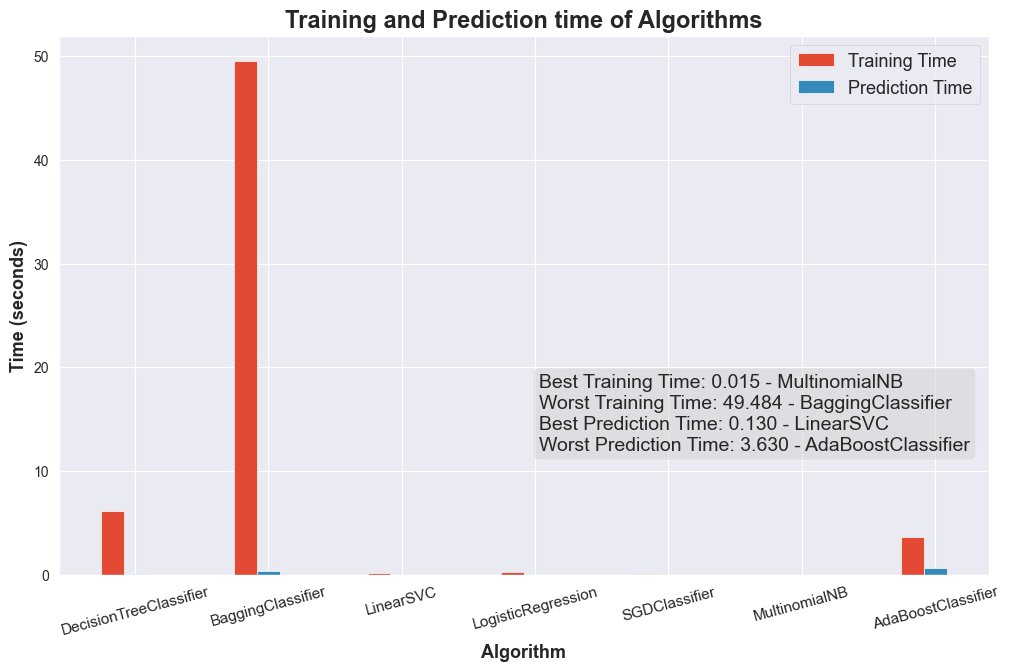

In [97]:
best_train_time = results[results['Training Time'] == results['Training Time'].min()]
worst_train_time = results[results['Training Time'] == results['Training Time'].max()]
best_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].min()]
worst_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].max()]

plt.figure(figsize = (12, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Training Time']
bars2 = results['Prediction Time']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Training Time')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Prediction Time')
 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Time (seconds)', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)


textstr = '\n'.join(('Best Training Time: {:.3f} - {}'.format(best_train_time['Training Time'].values[0], best_train_time['Algorithm'].values[0]), 
                     'Worst Training Time: {:.3f} - {}'.format(worst_train_time['Training Time'].values[0], worst_train_time['Algorithm'].values[0]),
                   'Best Prediction Time: {:.3f} - {}'.format(best_prediction_time['Training Time'].values[0], best_prediction_time['Algorithm'].values[0]), 
                    'Worst Prediction Time: {:.3f} - {}'.format(worst_prediction_time['Training Time'].values[0], worst_prediction_time['Algorithm'].values[0])))
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
plt.text(3.2, 12, textstr, fontsize=14,  bbox=props) 

# Create legend & Show graphic
plt.legend(fontsize = 13)
plt.title('Training and Prediction time of Algorithms', fontweight = 'bold', fontsize = 17)

Let's now create the prediction system

In [98]:
df.head()

,headline,label,length_headline
0,cock suck before you piss around on my work,1,44
1,you are gay or antisemmitian archangel white ...,1,624
2,fuck your filthy mother in the ass dry,1,39
3,get fuck ed up get fuck ed up got a drink t...,1,121
4,stupid peace of shit stop deleting my stuff ...,1,93


- Load the entire TfidfVectorizer object

In [99]:
with open('tfidfvectorizer.pkl', 'rb') as file:
    tfidf_vectorizer = pickle.load(file)


In [100]:
# Example data to predict
data = ['You are someone I would like to have be with']

# Transform the data using the loaded vectorizer
preprocessed_data = tfidf_vectorizer.transform(data)

# Load the trained model
trained_model = pickle.load(open('LinearSVC.pkl', 'rb'))

# Make predictions
prediction = trained_model.predict(preprocessed_data)

# Print the prediction
if prediction == 1:
    print('bullying')
else:
    print('non-bullying')

non-bullying


c:\Users\kccha\OneDrive\Desktop\Programming\Cyber bullying detection\cyberbullyingdetectorenv\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ninad'] not in stop_words.
  warnings.warn(


Attempting some fine-tuning

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def tuning(clf, param_dict, X_train, y_train, X_test, y_test):
    scorer = make_scorer(f1_score)

    grid_obj = GridSearchCV(estimator=clf, param_grid=param_dict, scoring=scorer, cv= 5 )

    grid_fit = grid_obj.fit(X_train, y_train)

    best_clf = grid_fit.best_estimator_

    prediction = (clf.fit(X_train, y_train)).predict(X_test)

    best_prediction = best_clf.predict(X_test)

    print(clf.__class__.__name__)
    print(f'Best Parameter: {grid_fit.best_params_}')

    print(f'Accuracy: {accuracy_score(y_test,best_prediction)}')

    print(f'F1 Score: {f1_score(y_test,best_prediction)}')

    print(f'Precision: {precision_score(y_test,best_prediction)}')
    
    print(f'Recall: {recall_score(y_test,best_prediction)}')

In [102]:
param_grid = {
    'C' : [0.25, 0.5, 0.75, 1, 1.2]
}

clf_model = LinearSVC()

tuning(clf_model, param_grid, training_data, y_train, testing_data, y_test)

LinearSVC
Best Parameter: {'C': 1.2}
Accuracy: 0.9644628099173553
F1 Score: 0.9724888035828535
Precision: 0.9733191035218783
Recall: 0.97165991902834


In [103]:
pickle.dump(clf_model, open('LinearSVCTuned.pkl', 'wb'))